#### Algumas metricas podem ser aplicadas para avaliar o KMEANS. Sao elas a magnitude e a cardinalidade. Magnitude 'e a soma das distancias de todos os pontos pro centroide. Ja a cardinalidade representa a quantidade de pontos em cada cluster. 
#### O melhor dos mundos seria um cluster bem distribuido e compacto (quantidade proxima de cada cluster e soma das distancias 'e pequena)

Cluster
4    81
0    39
2    35
3    23
1    22
Name: count, dtype: int64


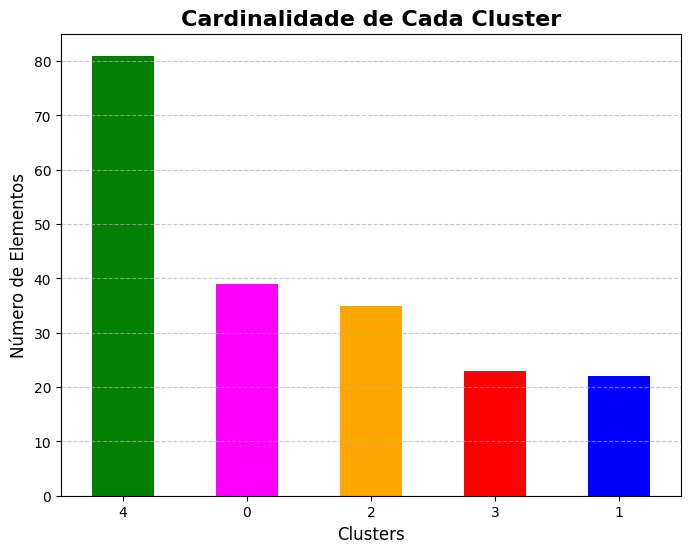

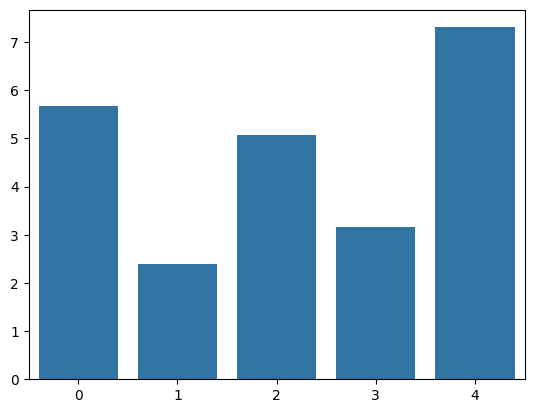

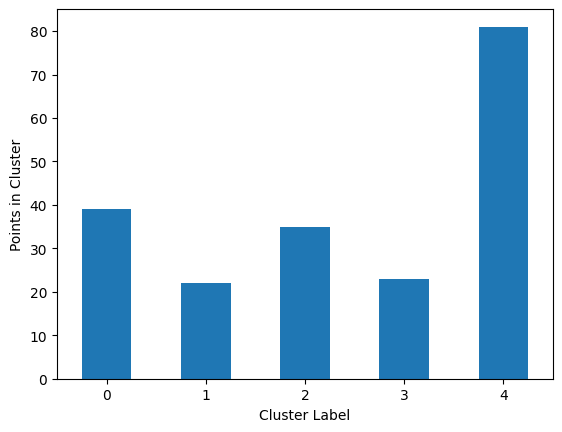

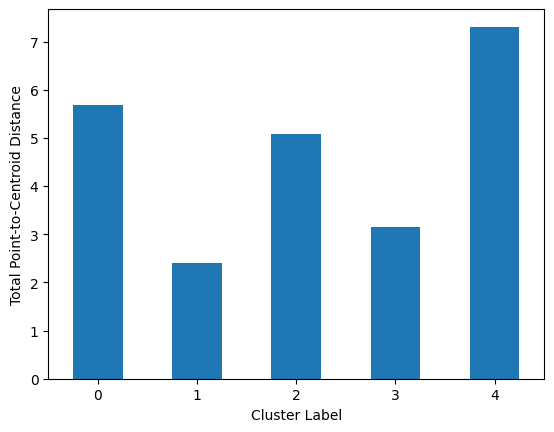

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

N_CLUSTER = 5  
dataset = pd.read_csv("Mall_Customers.csv", sep=",")
data_x = dataset.iloc[:, 3:5]
data_x.head()
x_array =  np.array(data_x)

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled


from sklearn.cluster import KMeans
numerics = dataset[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in numerics:
        scaler.fit(dataset[[i]])
        dataset[i] = scaler.transform(dataset[[i]])
km = KMeans(n_clusters=N_CLUSTER)
y_predicted = km.fit_predict(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted


dataset["Cluster"] = y_predicted

cordinalidade = dataset['Cluster'].value_counts()

print(cordinalidade)

plt.figure(figsize=(8, 6))
cordinalidade.plot(kind='bar', color=['green', 'magenta', 'orange', 'red', 'blue'])
plt.title('Cardinalidade de Cada Cluster', fontsize=16, fontweight='bold')
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Número de Elementos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Calculando a magnitude na forma de algoritmo
distancias = km.transform(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])

magnitude = []

for cluster in range(N_CLUSTER):
    soma_distancias = 0
    for index, ponto in enumerate(distancias):
        if( y_predicted[index] ==cluster ):
            soma_distancias = soma_distancias+ ponto[cluster]
    magnitude.append(soma_distancias)

sns.barplot(magnitude)

#Verificando os metodos utilizando das bibliotecas:

from ds_utils.unsupervised import plot_cluster_cardinality
from scipy.spatial.distance import euclidean

plot_cluster_cardinality(km.labels_)


X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']].values
from ds_utils.unsupervised import plot_cluster_magnitude
plot_cluster_magnitude(X, km.labels_, km.cluster_centers_, euclidean)
plt.show()


